You need to run
```bash
python src/run_trained_agents.py \
--has_cuda=0 \
--safe_max_rho 1.0 \
--limit_cs_margin 60 \
--expe_name figure_7 \
--nb_process XXX \
--path_agents saved_model
```
before this notebook

In [1]:
import matplotlib.pyplot as plt
import json
import os
import re
import numpy as np
import grid2op
from lightsim2grid import LightSimBackend
from grid2op.utils import ScoreL2RPN2022
# from src.mixture_experts import make_agent
from base_agent_per_month import make_agent_per_month

2022-10-12 10:22:31.665411: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 10:22:31.665435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/boguslawskieva/miniconda3/envs/baselines_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
env_name = "/home/boguslawskieva/L2RPN-WCCI-Baselines/input_data_val"
scores_mixture_experts = []

env = grid2op.make(env_name, backend=LightSimBackend())
with open(os.path.join(env._init_env_path, "scenarios_info_seeds.json")) as f:
    seeds = json.load(f)

env_seeds = [int(seeds[os.path.split(el)[-1]]["seed"]) for el in sorted(env.chronics_handler.real_data.subpaths)]
scorer = ScoreL2RPN2022(env, env_seeds, nb_process_stats=1, nb_scenario=len(env_seeds), verbose=2)

try:
    scores_agents_per_month=np.load("./scores_for_notebooks/scores_agents_per_month.npy")
    ts_survived_agents_per_month=np.load("./scores_for_notebooks/ts_survived_agents_per_month.npy")
except:
    scores_agents_per_month = []
    ts_survived_agents_per_month = []
    for i in range(8):
        agent = make_agent_per_month(env, ".", "saved_model/expe_train_per_month/GymEnvWithRecoDNShuffle_per_month_"+str(i), 
                                                # gymenv_kwargs={"safe_max_rho":0.9}
                                                )
        scores_agent_pm, ts_survived_agent_pm, _ = scorer.get(agent)
        scores_agent_pm = np.array(scores_agent_pm)
        ts_survived_agent_pm = np.array(ts_survived_agent_pm)
        scores_agents_per_month.append(scores_agent_pm)
        ts_survived_agents_per_month.append(ts_survived_agent_pm)
    scores_agents_per_month = np.array(scores_agents_per_month)
    ts_survived_agents_per_month = np.array(ts_survived_agents_per_month)
    np.save("./scores_for_notebooks/scores_agents_per_month.npy", scores_agents_per_month)
    np.save("./scores_for_notebooks/ts_survived_agents_per_month.npy", ts_survived_agents_per_month)

In [33]:
from grid2op.Agent import RecoPowerlineAgent
from grid2op.Agent import DoNothingAgent

try:
    scores_reco_agent=np.load("./scores_for_notebooks/scores_reco_agent.npy")
    ts_survived_reco_agent=np.load("./scores_for_notebooks/ts_survived_reco_agent.npy")
except:
    reco_agent = RecoPowerlineAgent(env.action_space)
    scores_reco_agent, ts_survived_reco_agent, _ = scorer.get(reco_agent)
    scores_reco_agent = np.array(scores_reco_agent)
    ts_survived_reco_agent = np.array(ts_survived_reco_agent)
    np.save("./scores_for_notebooks/scores_reco_agent.npy", scores_reco_agent)
    np.save("./scores_for_notebooks/ts_survived_reco_agent.npy", ts_survived_reco_agent)
    dn_agent = DoNothingAgent(env.action_space)
    _, ts_survived_dn_agent, _ = scorer.get(dn_agent)
    ts_survived_dn_agent = np.array(ts_survived_dn_agent)
    np.save("./scores_for_notebooks/ts_survived_dn_agent.npy", ts_survived_dn_agent)
scores_maze_rl_agent = np.array([78.13369010447818, 78.28434499619446, 5.167743997750719, 78.38581310025079, 19.785917196880447, 78.50461429780104, 78.37174950359326, 37.128867786573764, 6.2932213907435965, 78.56766976579124, -0.8296018574588749, 75.91428207783694, 78.49040211340403, 77.46750217678775, 78.3265040762619, 78.48736295260925, 78.47138556083354, 78.11626754051858, 78.24790120148911, 77.1047434115315, 77.93736956245708, 77.71743783115767, 77.72359850311321, 75.54766965640773, 75.72127560653462, -2.628035186555462, 76.6169078196405, 74.68323174328125, 75.55201395446133, 74.67981679624417, 77.46966064193904, 77.02948678750438, 77.38321474493578, 77.31961252196491, 76.27113512374474, 77.88749445274836, 75.69150060980851, 71.5827245121084, 78.00035235357369, 76.67137638994404, 76.34324459718947, 77.94826984301193, 77.04020399015742, 77.84434940761057, 77.69664133508446, 77.57073774299711, 42.55699740602682, 14.385061030640813, 77.41024901325044, 78.15568725387712, 78.73232998573765, 17.837378570170024])
ts_survived_maze_rl_agent = np.array([2017, 2017, 260, 2017, 652, 2017, 2017, 938, 387, 2017, 282, 1953, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 1142, 475, 2017, 2017, 2017, 647])

Starts the evaluation of the agent


episode: 100%|██████████| 52/52 [01:59<00:00,  2.29s/it]


Start the evaluation of the scores
Starts the evaluation of the agent


episode: 100%|██████████| 52/52 [01:48<00:00,  2.08s/it]


Start the evaluation of the scores


In [34]:
scores_reco_agent.mean(), ts_survived_reco_agent.mean()

(5.444439414682075, 525.4615384615385)

In [35]:
scores_agents_per_month.shape, scores_agents_per_month.mean(axis=1)

((8, 52),
 array([ 1.79849685,  6.99772373,  8.11914381, 16.58927535, 11.44559046,
        11.74954592,  2.62259908,  3.29223608]))

In [36]:
path = "."
with open (os.path.join(path, "agents_runs_eval_PPO_1week_1M_0.9_0.2.json"), "r") as f:
    dict_all_ = json.load(f)
scores_PPO_1week_1M_02 = []
scores_PPO_1week_1M_09 = []
ts_survived_PPO_1week_1M_02 = []
ts_survived_PPO_1week_1M_09 = []
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items():
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            nb_survived_this = []
            for weights_dir_str, tmp_res_model in list(res_iter.items())[0:8]:
                if float(safe_max_rho_)==0.2:
                    scores_PPO_1week_1M_02.append(tmp_res_model["scores"])
                    ts_survived_PPO_1week_1M_02.append(tmp_res_model["n_played"])
                elif float(safe_max_rho_)==0.9:
                    scores_PPO_1week_1M_09.append(tmp_res_model["scores"])
                    ts_survived_PPO_1week_1M_09.append(tmp_res_model["n_played"])
scores_PPO_1week_1M_02 = np.array(scores_PPO_1week_1M_02)
scores_PPO_1week_1M_09 = np.array(scores_PPO_1week_1M_09)
ts_survived_PPO_1week_1M_02 = np.array(ts_survived_PPO_1week_1M_02)
ts_survived_PPO_1week_1M_09 = np.array(ts_survived_PPO_1week_1M_09)
scores_PPO_1week_1M=scores_PPO_1week_1M_09
ts_survived_PPO_1week_1M=ts_survived_PPO_1week_1M_09
scores_PPO_1week_1M_02.mean(), scores_PPO_1week_1M_09.mean(), ts_survived_PPO_1week_1M_02.mean(), ts_survived_PPO_1week_1M_09.mean()

(-9.268300340056602, 3.482144000542386, 575.1346153846154, 663.1706730769231)

In [11]:
scores_PPO_1week_1M.shape, scores_agents_per_month.shape

((8, 52), (8, 52))

In [47]:
# Aggregation by month
scores_by_month = np.zeros((8,12))
scores_PPO_1week_1M_by_month = np.zeros((8,12))
scores_dn_by_month = np.zeros(12)
scores_reco_by_month = np.zeros(12)
scores_maze_rl_agent_by_month = np.zeros(12)
ts_survived_by_month = np.zeros((8,12))
ts_survived_PPO_1week_1M_by_month = np.zeros((8,12))
ts_survived_reco_by_month = np.zeros(12)
ts_survived_dn_by_month = np.zeros(12)
ts_survived_maze_rl_agent_by_month = np.zeros(12)
patterns = list(map(lambda x: re.compile(".*-"+ x + "-.*"), ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]))
for j in range(12):
    chronics_ids = np.where(list(map(lambda x: re.match(patterns[j],x) is not None, sorted(env.chronics_handler.real_data.subpaths))))[0]
    scores_PPO_1week_1M_by_month[:,j] = scores_PPO_1week_1M[:,chronics_ids].mean(axis=1)
    scores_by_month[:,j] = scores_agents_per_month[:,chronics_ids].mean(axis=1)
    scores_reco_by_month[j] = scores_reco_agent[chronics_ids].mean()
    scores_maze_rl_agent_by_month[j] = scores_maze_rl_agent[chronics_ids].mean()
    ts_survived_PPO_1week_1M_by_month[:,j] = ts_survived_PPO_1week_1M[:,chronics_ids].mean(axis=1)
    ts_survived_by_month[:,j] = ts_survived_agents_per_month[:,chronics_ids].mean(axis=1)
    ts_survived_reco_by_month[j] = ts_survived_reco_agent[chronics_ids].mean()
    ts_survived_dn_by_month[j] = ts_survived_dn_agent[chronics_ids].mean()
    ts_survived_maze_rl_agent_by_month[j] = ts_survived_maze_rl_agent[chronics_ids].mean()

scores_by_month, scores_reco_by_month, ts_survived_by_month, ts_survived_reco_by_month

(array([[-1.94705210e+01, -4.74592574e+01,  5.72259461e-01,
         -1.55769023e+01,  1.35023166e+01, -1.16724013e+01,
         -1.19195858e+01,  2.25921531e+01,  5.64049793e+01,
          1.91733039e+00,  3.51681351e+01, -5.31336694e+00],
        [ 1.86095976e+00, -5.09942108e+01, -6.26828590e+00,
         -3.78816748e+00,  6.37251551e+00, -1.20897621e+01,
          2.75888245e+01,  3.62337864e+01,  2.67511730e+01,
          2.14537264e+00,  2.68058074e+01,  2.46992371e+01],
        [-1.80876683e+01, -4.96999861e+01,  5.01164087e+00,
          1.45060671e-01,  1.04403555e+01,  2.89616194e+01,
          2.74817402e+01,  2.15782419e+00,  4.49614391e+01,
          2.29035627e+01,  2.00132298e+01,  6.90653296e+00],
        [-1.46398838e+01, -1.53508239e+01, -5.83900470e+00,
          1.99126852e+01,  1.91770993e+01,  9.06879236e+00,
          2.25568616e+01,  2.85596835e+01,  6.95400499e+01,
          3.16153572e+01,  1.88496700e+01,  1.60320287e+01],
        [-1.74273032e+01, -4.2552244

In [38]:
scores_by_month.mean(axis=0), ts_survived_by_month.mean(axis=0)

(array([-12.37404204, -42.95195268,  -1.18769194,   1.39647153,
         11.4460636 ,   3.27449858,  29.19895696,  26.62458941,
         36.66335184,  16.41308179,  19.23002244,   3.48797065]),
 array([ 240.675  ,   49.15625,  178.03125,  387.65625,  498.2    ,
        1227.5625 , 1455.84375,  879.825  , 1402.375  ,  752.525  ,
         612.15625,  377.0625 ]))

In [39]:
scores_by_month.mean(), scores_reco_agent.mean()

(7.601776678169803, 5.444439414682075)

In [40]:
scores_PPO_1week_1M_by_month.mean(axis=0)

array([-30.65580457, -58.75317563,  -9.23895266,  -5.97096188,
         9.75177444, -18.09841155,  38.60829419,  21.22823199,
        46.96039128,  25.51837627,  15.60642198,   3.85104362])

In [41]:
scores_maze_rl_agent.mean()

66.55383415374307

In [42]:
scores_PPO_1week_1M.mean()

3.482144000542386

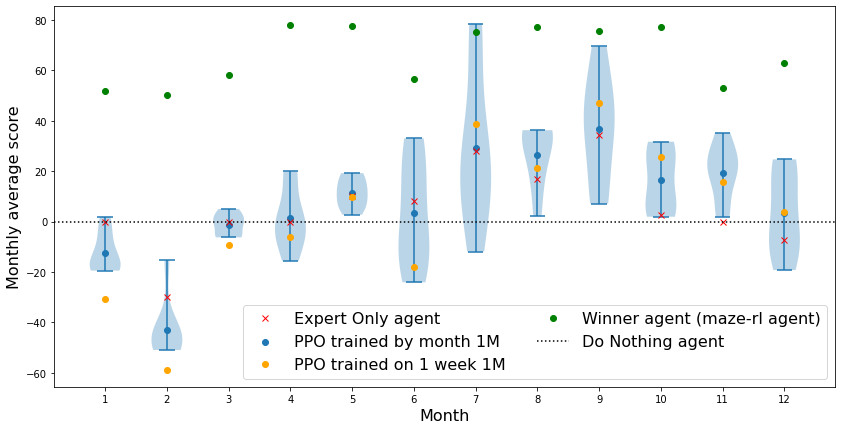

In [81]:
# How to compare with previous PPO
plt.figure(figsize=(14, 7))
plt.violinplot([scores_by_month[:,i] for i in range(scores_by_month.shape[1])])
plt.plot(np.arange(1,13), scores_reco_by_month, label="Expert Only agent", marker='x', color="red", linestyle='')
plt.scatter(np.arange(1,13), scores_by_month.mean(axis=0), label="PPO trained by month 1M", marker='o')
plt.plot(np.arange(1,13), scores_PPO_1week_1M_by_month.mean(axis=0), label="PPO trained on 1 week 1M", marker='o', color="orange", linestyle='')
plt.plot(np.arange(1,13), scores_maze_rl_agent_by_month, label="Winner agent (maze-rl agent)", marker='o', color="green", linestyle='')
plt.axhline(0, label=f"Do Nothing agent", color="black", linestyle=':')
# plt.axhline(66.55, label="Winner agent", color="green", linestyle=':')
# plt.axhline(22.09, label="PPO trained on 1 week 10M", color="orange", linestyle='-.')
plt.ylabel("Monthly average score", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(np.arange(1,13))
plt.legend(fontsize=16, ncol=2)
plt.show()

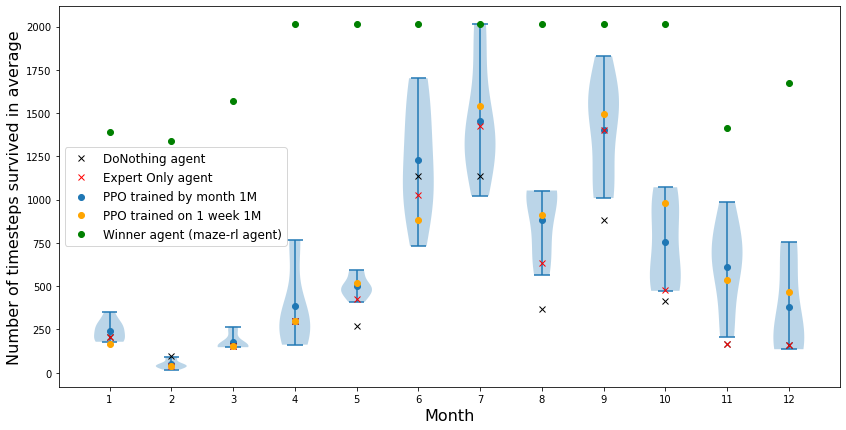

In [84]:
# How to compare with previous PPO
plt.figure(figsize=(14, 7))
plt.violinplot([ts_survived_by_month[:,i] for i in range(ts_survived_by_month.shape[1])])
plt.plot(np.arange(1,13), ts_survived_dn_by_month, label="DoNothing agent", marker='x', color="black", linestyle='')
plt.plot(np.arange(1,13), ts_survived_reco_by_month, label="Expert Only agent", marker='x', color="red", linestyle='')
plt.scatter(np.arange(1,13), ts_survived_by_month.mean(axis=0), label="PPO trained by month 1M", marker='o')
plt.plot(np.arange(1,13), ts_survived_PPO_1week_1M_by_month.mean(axis=0), label="PPO trained on 1 week 1M", marker='o', color="orange", linestyle='')
plt.plot(np.arange(1,13), ts_survived_maze_rl_agent_by_month, label="Winner agent (maze-rl agent)", marker='o', color="green", linestyle='')
# plt.axhline(66.55, label="Winner agent", color="green", linestyle=':')
# plt.axhline(22.09, label="PPO trained on 1 week 10M", color="orange", linestyle='-.')
plt.ylabel("Number of timesteps survived in average", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(np.arange(1,13))
plt.legend(fontsize=12, ncol=1)
plt.show()

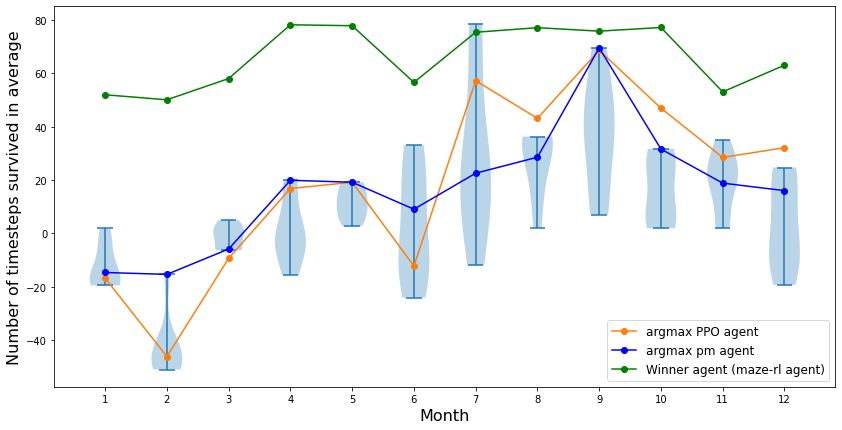

In [78]:
# How to compare with previous PPO
plt.figure(figsize=(14, 7))
plt.violinplot([scores_by_month[:,i] for i in range(ts_survived_by_month.shape[1])])
# plt.plot(np.arange(1,13), ts_survived_dn_by_month, label="DoNothing agent", marker='o', color="black", linestyle='')
plt.plot(np.arange(1,13), scores_PPO_1week_1M_by_month[6,:], label="argmax PPO agent", marker='o', linestyle='-')
plt.plot(np.arange(1,13), scores_by_month[3,:], label="argmax pm agent", marker='o', linestyle='-', color='blue')
# plt.plot(np.arange(1,13), ts_survived_reco_by_month, label="Expert Only agent", marker='o', color="red", linestyle='')
# plt.scatter(np.arange(1,13), ts_survived_by_month.mean(axis=0), label="PPO trained by month 1M", marker='o')
# plt.plot(np.arange(1,13), ts_survived_PPO_1week_1M_by_month.mean(axis=0), label="PPO trained on 1 week 1M", marker='o', color="orange", linestyle='')
plt.plot(np.arange(1,13), scores_maze_rl_agent_by_month, label="Winner agent (maze-rl agent)", marker='o', color="green", linestyle='-')
# plt.axhline(66.55, label="Winner agent", color="green", linestyle=':')
# plt.axhline(22.09, label="PPO trained on 1 week 10M", color="orange", linestyle='-.')
plt.ylabel("Number of timesteps survived in average", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(np.arange(1,13))
plt.legend(fontsize=12, ncol=1)
plt.show()

In [45]:
ts_survived_by_month.mean(), ts_survived_PPO_1week_1M_by_month.mean()

(671.7557291666667, 664.8375)

In [70]:
np.max(ts_survived_agents_per_month.mean(axis=1)), np.max(ts_survived_PPO_1week_1M.mean(axis=1))

(788.9230769230769, 890.2307692307693)